In [1]:
#final output contains the merged file for sulfate, nitrate and the metadata etc.
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import (mean_absolute_error, mean_squared_error, 
                             mean_absolute_percentage_error, explained_variance_score, 
                             max_error, mean_squared_log_error, median_absolute_error, 
                             r2_score, mean_poisson_deviance, mean_gamma_deviance)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



In [2]:
df = pd.read_csv('/Users/defne/Downloads/alles.csv')
# Remove the Unnamed: 0 and Datetime columns
df = df.drop(columns=['station_id', 'Date'])

/var/folders/fs/9hkffwc95yz53x44d27zb2ym0000gn/T/ipykernel_30309/222829863.py:1: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/defne/Downloads/alles.csv')


In [3]:
df.columns

Index(['site_latitude', 'site_longitude', 'NO3', 'SO4', 'NO3-', 'SO42-',
       'elevation_1k', 'elevation_yNA_bNA', 'road_class_1_700',
       'road_class_2_50', 'road_class_1_500', 'road_class_3_50',
       'road_class_2_400', 'road_class_1_100', 'road_class_2_700',
       'road_class_3_100', 'road_class_2_500', 'road_class_1_400',
       'road_class_3_400', 'road_class_1_2000', 'road_class_3_1000',
       'road_class_3_10000', 'road_class_1_300', 'road_class_3_500',
       'road_class_2_2000', 'road_class_1_1000', 'road_class_3_300',
       'road_class_2_200', 'road_class_1_200', 'road_class_2_1000',
       'road_class_1_5000', 'road_class_1_50', 'road_class_3_200',
       'road_class_3_5000', 'road_class_2_300', 'road_class_2_5000',
       'road_class_3_2000', 'road_class_2_100', 'road_class_3_700',
       'road_class_2_10000', 'road_class_1_10000', 'imd_b500', 'imd_b1000',
       'imd', 'CLC', 'snow_ice_b1000', 'snow_ice_b500', 'urban_fabric_b1000',
       'urban_fabric_b500', 'in

In [4]:
df.shape

(482614, 77)

In [5]:
#Getting rid of nan values and non numeric values
for col in df.columns:
     df[col] = pd.to_numeric(df[col], errors='coerce')


In [6]:
for colname in df.columns:
    df = df[pd.to_numeric(df[colname], errors='coerce').notnull()]
    

In [7]:
df.shape

(173503, 77)

# Random Forest - predicting the concentration

In [8]:

# Define the variable to predict (Nitrate) and features

y = df['NO3-'] 
X = df.drop(columns=['NO3-'])  # Drop the target column from the features

# Split the data into training and validation sets
xv = X.sample(frac=0.2)        # X for validation (20%)
xx = X.drop(xv.index)          # X for training (80%)
yv = y.loc[xv.index]           # Y for validation (20%)
yx = y.drop(xv.index) # Y for training (80%)

#print(xx)
# Initialize and train the RandomForestRegressor
regr = RandomForestRegressor(max_depth=100, random_state=125) # Need to tune these parameters
regr.fit(xx, yx)  # Train with training data (80%)

# Make predictions
y_tra = regr.predict(xx)  # Predictions on training set
y_val = regr.predict(xv)  # Predictions on validation set


yv_const = yv


In [9]:
#Code for MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    epsilon = 1e-10  # A small constant to avoid division by zero
    return np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100


R² score: 0.7961515808099792
Mean Absolute Error (MAE): 0.3813008787708175
Mean Squared Error (MSE): 0.7685658760685364
Root Mean Squared Error (RMSE): 0.876678889941201
Mean Absolute Percentage Error (MAPE): 211475557.29050687 %


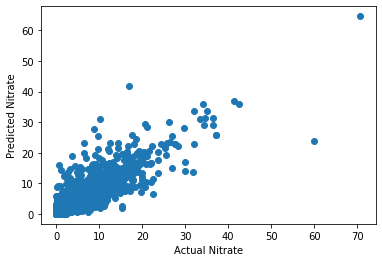

(34701,)
(34701,)


In [10]:
print('R² score:', regr.score(xv, yv))
print('Mean Absolute Error (MAE):', mean_absolute_error(yv, y_val))
print('Mean Squared Error (MSE):', mean_squared_error(yv, y_val))
print('Root Mean Squared Error (RMSE):', mean_squared_error(yv, y_val, squared=False))
print('Mean Absolute Percentage Error (MAPE):', mean_absolute_percentage_error(yv, y_val), '%')

# Convert yv to float
yv = pd.to_numeric(yv, errors='coerce')

# Plot results
plt.figure()
plt.scatter(yv, y_val)
plt.xlabel('Actual Nitrate')
plt.ylabel('Predicted Nitrate')

# Set x-ticks
xtick_range = np.arange(yv.min(), yv.max(), 10)
plt.xticks(xtick_range)

plt.show()

print(yv.shape)
print(y_val.shape)

# Random Forest - Prediction of the percentage error

In [11]:
df = pd.read_csv('/Users/defne/Downloads/alles.csv')
# Remove the Unnamed: 0 and Datetime columns
df = df.drop(columns=['station_id', 'Date'])

/var/folders/fs/9hkffwc95yz53x44d27zb2ym0000gn/T/ipykernel_30309/222829863.py:1: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/defne/Downloads/alles.csv')


In [12]:
#Getting rid of nan values and non numeric values
for col in df.columns:
     df[col] = pd.to_numeric(df[col], errors='coerce')
for colname in df.columns:
    df = df[pd.to_numeric(df[colname], errors='coerce').notnull()]
    

In [13]:
df.shape

(173503, 77)

In [14]:
# Calculate P0.05 for the entire dataset
P0_05 = np.percentile(df['NO3-'], 5)

# Define a function to calculate the percentage error
def calculate_percentage_error(measurement):
    return (measurement - P0_05) / (measurement + P0_05)

In [15]:
# Create a new target variable based on the percentage error
df['Percentage_Error'] = df['NO3-'].apply(calculate_percentage_error)

# Define the variable to predict (Percentage Error) and features
y = df['Percentage_Error']
X = df.drop(columns=['NO3-', 'Percentage_Error'])  # Drop the original target and new target from the features

# Manually split the data into training and validation sets
xv = X.sample(frac=0.2, random_state=125)        # X for validation (20%)
xx = X.drop(xv.index)          # X for training (80%)
yv = y.loc[xv.index]           # Y for validation (20%)
yx = y.drop(yv.index)          # Y for training (80%)

# Initialize and train the RandomForestRegressor
regr = RandomForestRegressor(max_depth=100, random_state=125)
regr.fit(xx, yx)  # Train with training data (80%)

# Make predictions
y_train_pred = regr.predict(xx)  # Predictions on training set
y_val_pred = regr.predict(xv)  # Predictions on validation set

# Now y_train_pred and y_val_pred are predictions of the percentage error


Here is the correction using the prediction of the error

In [24]:
# Apply the correction
corrected_concentrations = yv_const + (y_val_pred *yv_const)

R² score: 0.28820620010511244
Mean Absolute Error (MAE): 0.7796129397294344
Mean Squared Error (MSE): 2.6836628293222864
Root Mean Squared Error (RMSE): 1.63818888694872
Mean Absolute Percentage Error (MAPE): 70.76449421843184 %


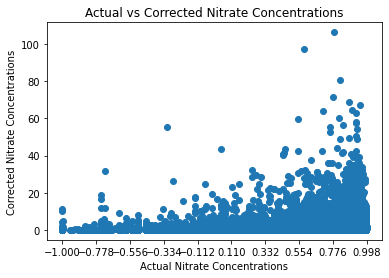

In [25]:
# Calculate the evaluation metrics
r2 = r2_score(yv_const, corrected_concentrations)
mae = mean_absolute_error(yv_const, corrected_concentrations)
mse = mean_squared_error(yv_const, corrected_concentrations)
rmse = mean_squared_error(yv_const, corrected_concentrations, squared=False)
mape = np.mean(np.abs((yv_const - corrected_concentrations) / yv_const)) * 100

# Print the metrics
print('R² score:', r2)
print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('Mean Absolute Percentage Error (MAPE):', mape, '%')

# Plotting the results
plt.figure()
plt.scatter(yv, corrected_concentrations)
plt.xlabel('Actual Nitrate Concentrations')
plt.ylabel('Corrected Nitrate Concentrations')
plt.title('Actual vs Corrected Nitrate Concentrations')

# Adjust x-ticks if necessary
xtick_range = np.linspace(yv.min(), yv.max(), num=10)  # Adjust number of ticks as needed
plt.xticks(xtick_range)

plt.show()


# Random Forest - Validation set from random stations

In [ ]:
df = pd.read_csv('/Users/defne/Downloads/alles.csv')
# Remove the Unnamed: 0 and Datetime columns
df_const = df
df = df.drop(columns=['station_id', 'Date'])

In [ ]:
df.columns

In [ ]:
df_const.columns

In [ ]:
for colname in df.columns:
    df = df[pd.to_numeric(df[colname], errors='coerce').notnull()]


In [ ]:
df.shape

In [ ]:
#Getting rid of nan values and non numeric values
for col in df.columns:
     df[col] = pd.to_numeric(df[col], errors='coerce')


In [ ]:
df_const['station_id'].iloc[482610]

In [ ]:
stations_for_validation = ['ID203','ID053','ID116','ID227']#almost 10 percent of the data

In [ ]:
#How many datapoints for validation
df_const[df_const['station_id'].isin(stations_for_validation)].shape

In [ ]:

# Define the variable to predict (Nitrate) and features

y = df['NO3-'] 
X = df.drop(columns=['NO3-'])  # Drop the target column from the features

# Split the data into training and validation sets
xv = X.sample(frac=0.2)        # X for validation (20%)
xx = X.drop(xv.index)          # X for training (80%)
yv = y.loc[xv.index]           # Y for validation (20%)
yx = y.drop(xv.index) # Y for training (80%)

#print(xx)
# Initialize and train the RandomForestRegressor
regr = RandomForestRegressor(max_depth=100, random_state=125) # Need to tune these parameters
regr.fit(xx, yx)  # Train with training data (80%)

# Make predictions
y_tra = regr.predict(xx)  # Predictions on training set
y_val = regr.predict(xv)  # Predictions on validation set


In [ ]:
print('R² score:', regr.score(xv, yv))
print('Mean Absolute Error (MAE):', mean_absolute_error(yv, y_val))
print('Mean Squared Error (MSE):', mean_squared_error(yv, y_val))
print('Root Mean Squared Error (RMSE):', mean_squared_error(yv, y_val, squared=False))
print('Mean Absolute Percentage Error (MAPE):', mean_absolute_percentage_error(yv, y_val), '%')

# Convert yv to float
yv = pd.to_numeric(yv, errors='coerce')

# Plot results
plt.figure()
plt.scatter(yv, y_val)
plt.xlabel('Actual Nitrate')
plt.ylabel('Predicted Nitrate')

# Set x-ticks
xtick_range = np.arange(yv.min(), yv.max(), 10)
plt.xticks(xtick_range)

plt.show()

print(yv.shape)
print(y_val.shape)

# SHAP

In [ ]:
!pip install shap

In [ ]:
import sys
print(sys.executable)


In [ ]:
!{sys.executable} -m pip install shap


In [ ]:
import shap
from sklearn.ensemble import RandomForestRegressor

# Assuming your model is already trained and is named 'regr'
# And your feature set for validation is 'xv'

# Initialize the SHAP Explainer with your model
explainer = shap.TreeExplainer(regr)

# Compute SHAP values for the validation set
shap_values = explainer.shap_values(xv)

# Generate a SHAP summary plot
shap.summary_plot(shap_values, xv, plot_type="bar")


# Comparison in unseen locations